Import Package

In [11]:
import cv2
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
def extract_frames(video_path, output_folder, frame_interval=10):
    """
    Mengekstrak frame dari video dan menyimpannya sebagai gambar.
    
    :param video_path: Path ke file video.
    :param output_folder: Folder tempat menyimpan frame.
    :param frame_interval: Ambil frame setiap N frame.
    """
    os.makedirs(output_folder, exist_ok=True)
    
    cap = cv2.VideoCapture(video_path)
    count = 0
    frame_count = 0
    
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        
        if count % frame_interval == 0:
            frame_filename = os.path.join(output_folder, f"frame_{frame_count}.jpg")
            cv2.imwrite(frame_filename, frame)
            frame_count += 1
        
        count += 1
    
    cap.release()
    print(f"Extracted {frame_count} frames from {video_path}")

# Contoh penggunaan
extract_frames("../datasets/training_videos/01.avi", "../datasets/images/01")
extract_frames("../datasets/training_videos/02.avi", "../datasets/images/02")
# extract_frames("../datasets/videos/normal_video.mp4", "dataset/images/normal")


Extracted 137 frames from ../datasets/training_videos/01.avi
Extracted 152 frames from ../datasets/training_videos/02.avi


Load Dataset

In [13]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = datagen.flow_from_directory(
    '../datasets/images/',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    subset='training'
)
validation_generator = datagen.flow_from_directory(
    '../datasets/images/',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 232 images belonging to 2 classes.
Found 57 images belonging to 2 classes.


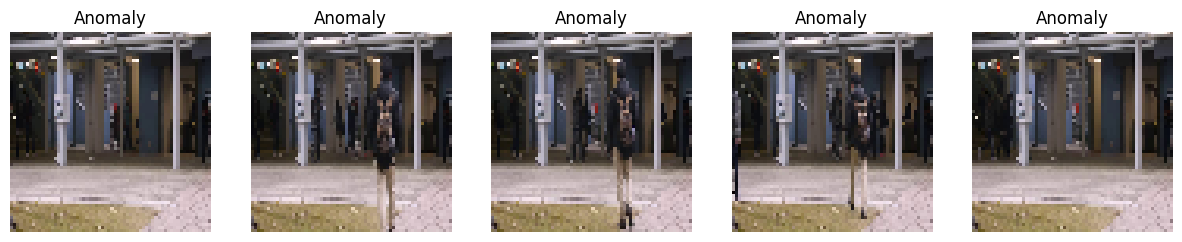

In [14]:
sample_images, sample_labels = next(train_generator)
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i in range(5):
    axes[i].imshow(sample_images[i])
    axes[i].set_title("Anomaly" if sample_labels[i] else "Normal")
    axes[i].axis("off")
plt.show()

In [15]:
def build_model():
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),
        MaxPooling2D(pool_size=(2,2)),
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D(pool_size=(2,2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = build_model()

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
history = model.fit(train_generator, validation_data=validation_generator, epochs=10)

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 535ms/step - accuracy: 0.4174 - loss: 1.1011 - val_accuracy: 0.4737 - val_loss: 0.6874
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 150ms/step - accuracy: 0.5723 - loss: 0.6829 - val_accuracy: 0.9825 - val_loss: 0.6779
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 151ms/step - accuracy: 0.5916 - loss: 0.6678 - val_accuracy: 0.5263 - val_loss: 0.6513
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 147ms/step - accuracy: 0.6760 - loss: 0.6364 - val_accuracy: 0.9825 - val_loss: 0.6001
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 153ms/step - accuracy: 0.8033 - loss: 0.5779 - val_accuracy: 0.9825 - val_loss: 0.4988
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 154ms/step - accuracy: 0.9094 - loss: 0.4561 - val_accuracy: 0.9825 - val_loss: 0.3495
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 140ms/step - accuracy: 0.9860 - loss: 0.2771 - val_accuracy: 0.9825 - val_loss: 0.1893
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 144ms/step - accuracy: 0.9866 - loss: 0.1578 - val_accuracy: 0.9825 - val_loss:

In [17]:
model.save("../model/anomaly_detection_model.h5")

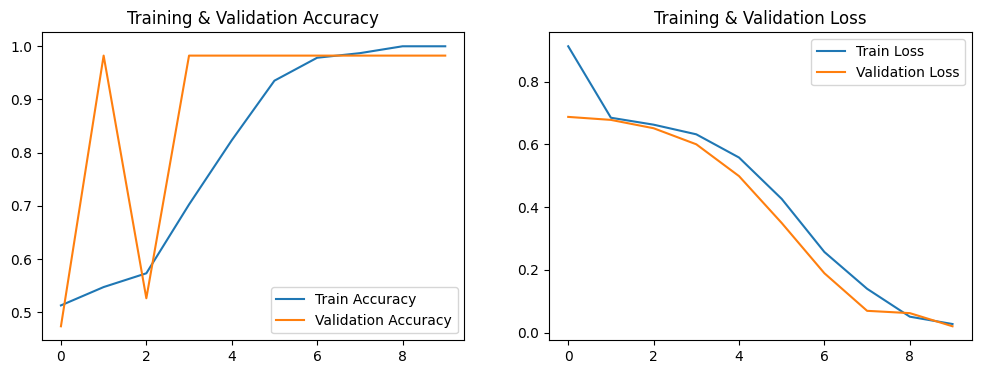

In [18]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Training & Validation Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Training & Validation Loss")
plt.show()

In [19]:
def capture_frame():
    cap = cv2.VideoCapture(0)
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        
        resized_frame = cv2.resize(frame, (64, 64))
        normalized_frame = resized_frame / 255.0
        input_frame = np.expand_dims(normalized_frame, axis=0)
        
        prediction = model.predict(input_frame)[0][0]
        label = "Normal" if prediction < 0.5 else "Anomaly"
        
        cv2.putText(frame, label, (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0) if prediction < 0.5 else (0, 0, 255), 2)
        cv2.imshow("Anomaly Detection", frame)
        
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [20]:
capture_frame()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━